In [1]:
import os
import pandas as pd

# Printing the current working directory
print(os.getcwd())

# Directory for importing the dataset
data_csv = pd.read_csv("C:\\Users\\HP\\Desktop\\Datamining\\assignment1\\dataset.csv")

# Displaying the first few rows of the dataset
data_csv.head()

c:\Users\HP\Desktop\Datamining\assignment1\jupyter\DMAT-assignment


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
#Checking for missing values in each column of dataset
missing_values = data_csv.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


Description of the dataset:
Calculating total counts who survived and not from the datatset
also, plotting numerical summary of each varaibles against frequency.


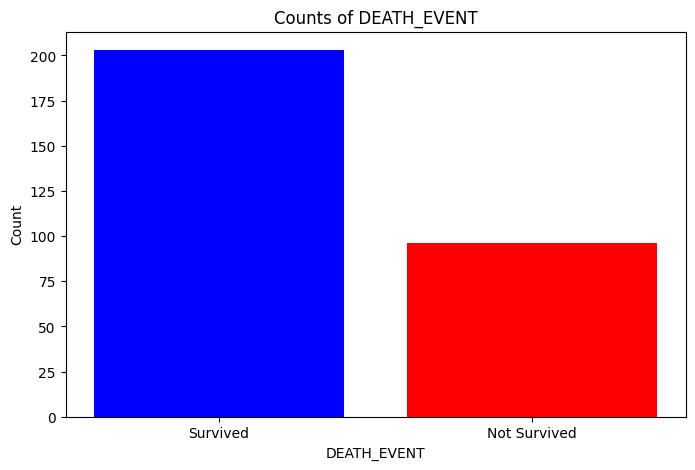

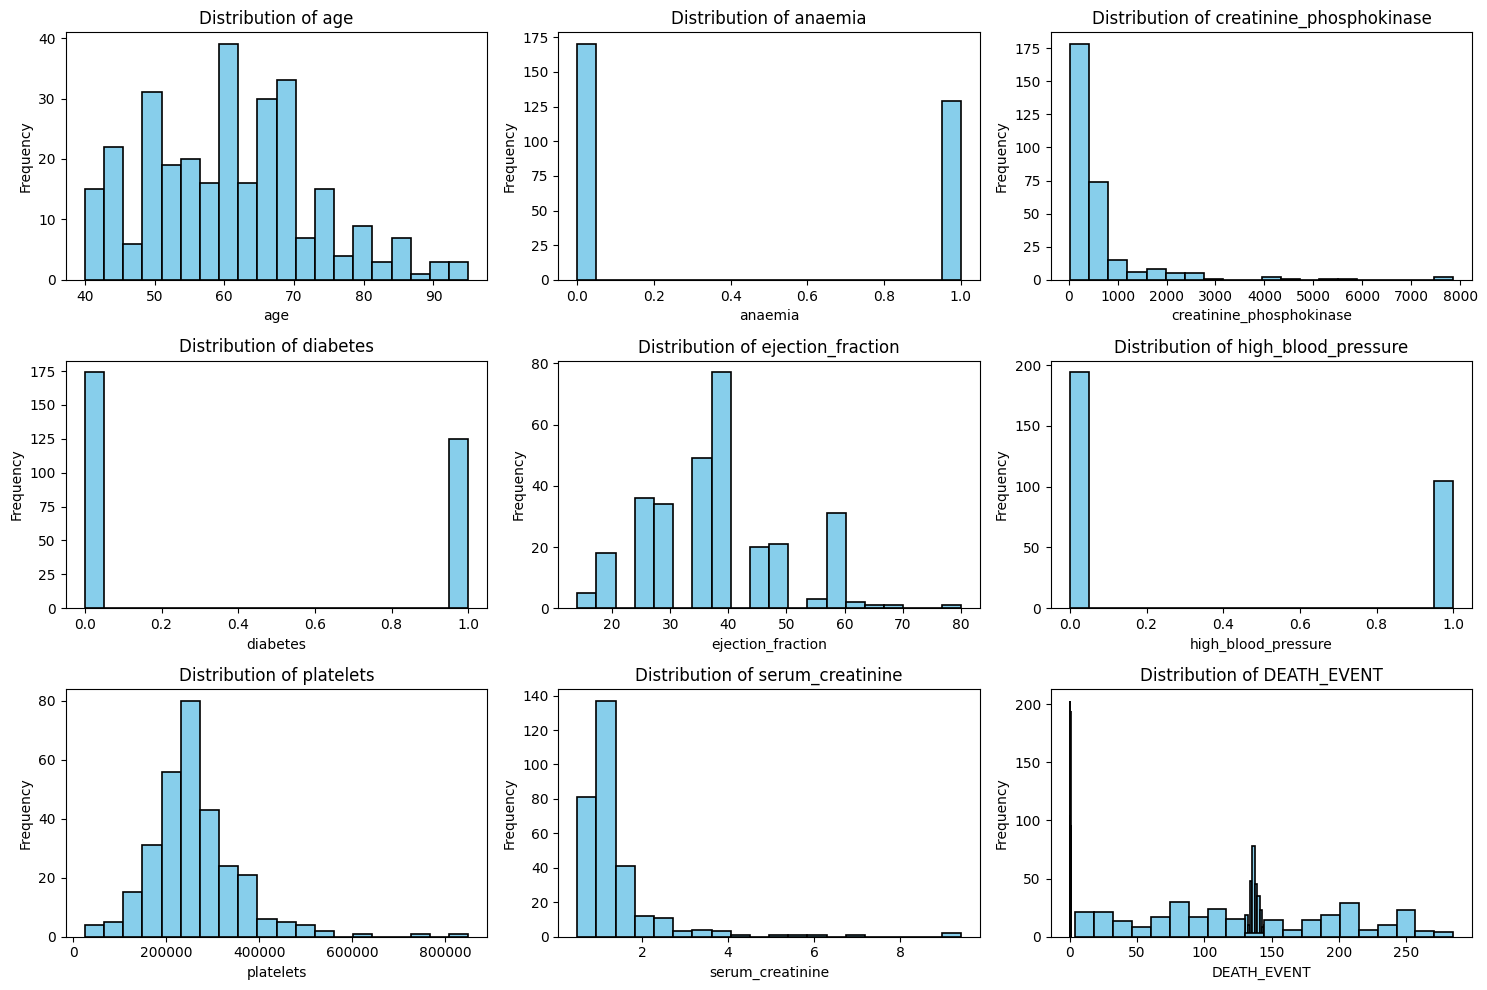

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt


#Calculating total counts for DEATH_EVENT
death_counts = data_csv['DEATH_EVENT'].value_counts()

#Plotting the total death counts
plt.figure(figsize=(8, 5))
plt.bar(death_counts.index, death_counts.values, color=['blue', 'red'])
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.title('Counts of DEATH_EVENT')
plt.xticks(death_counts.index, ['Survived', 'Not Survived'])
plt.show()


#Visualizing the distribution of numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_summary.columns):
    plt.subplot(3, 3, i + 1 if i < 8 else 9)  # Ensure subplot index is within the valid range
    plt.hist(data_csv[column], bins=20, color='skyblue', edgecolor='black', linewidth=1.2)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Finding outliers in the dataset:


Indices of outliers: (array([  1,   4,   9,  19,  28,  52,  52,  60,  64,  72, 103, 105, 109,
       131, 134, 171, 199, 217, 228, 296], dtype=int64), array([2, 8, 7, 8, 7, 2, 7, 2, 4, 2, 2, 6, 6, 7, 2, 2, 8, 7, 7, 6],
      dtype=int64))


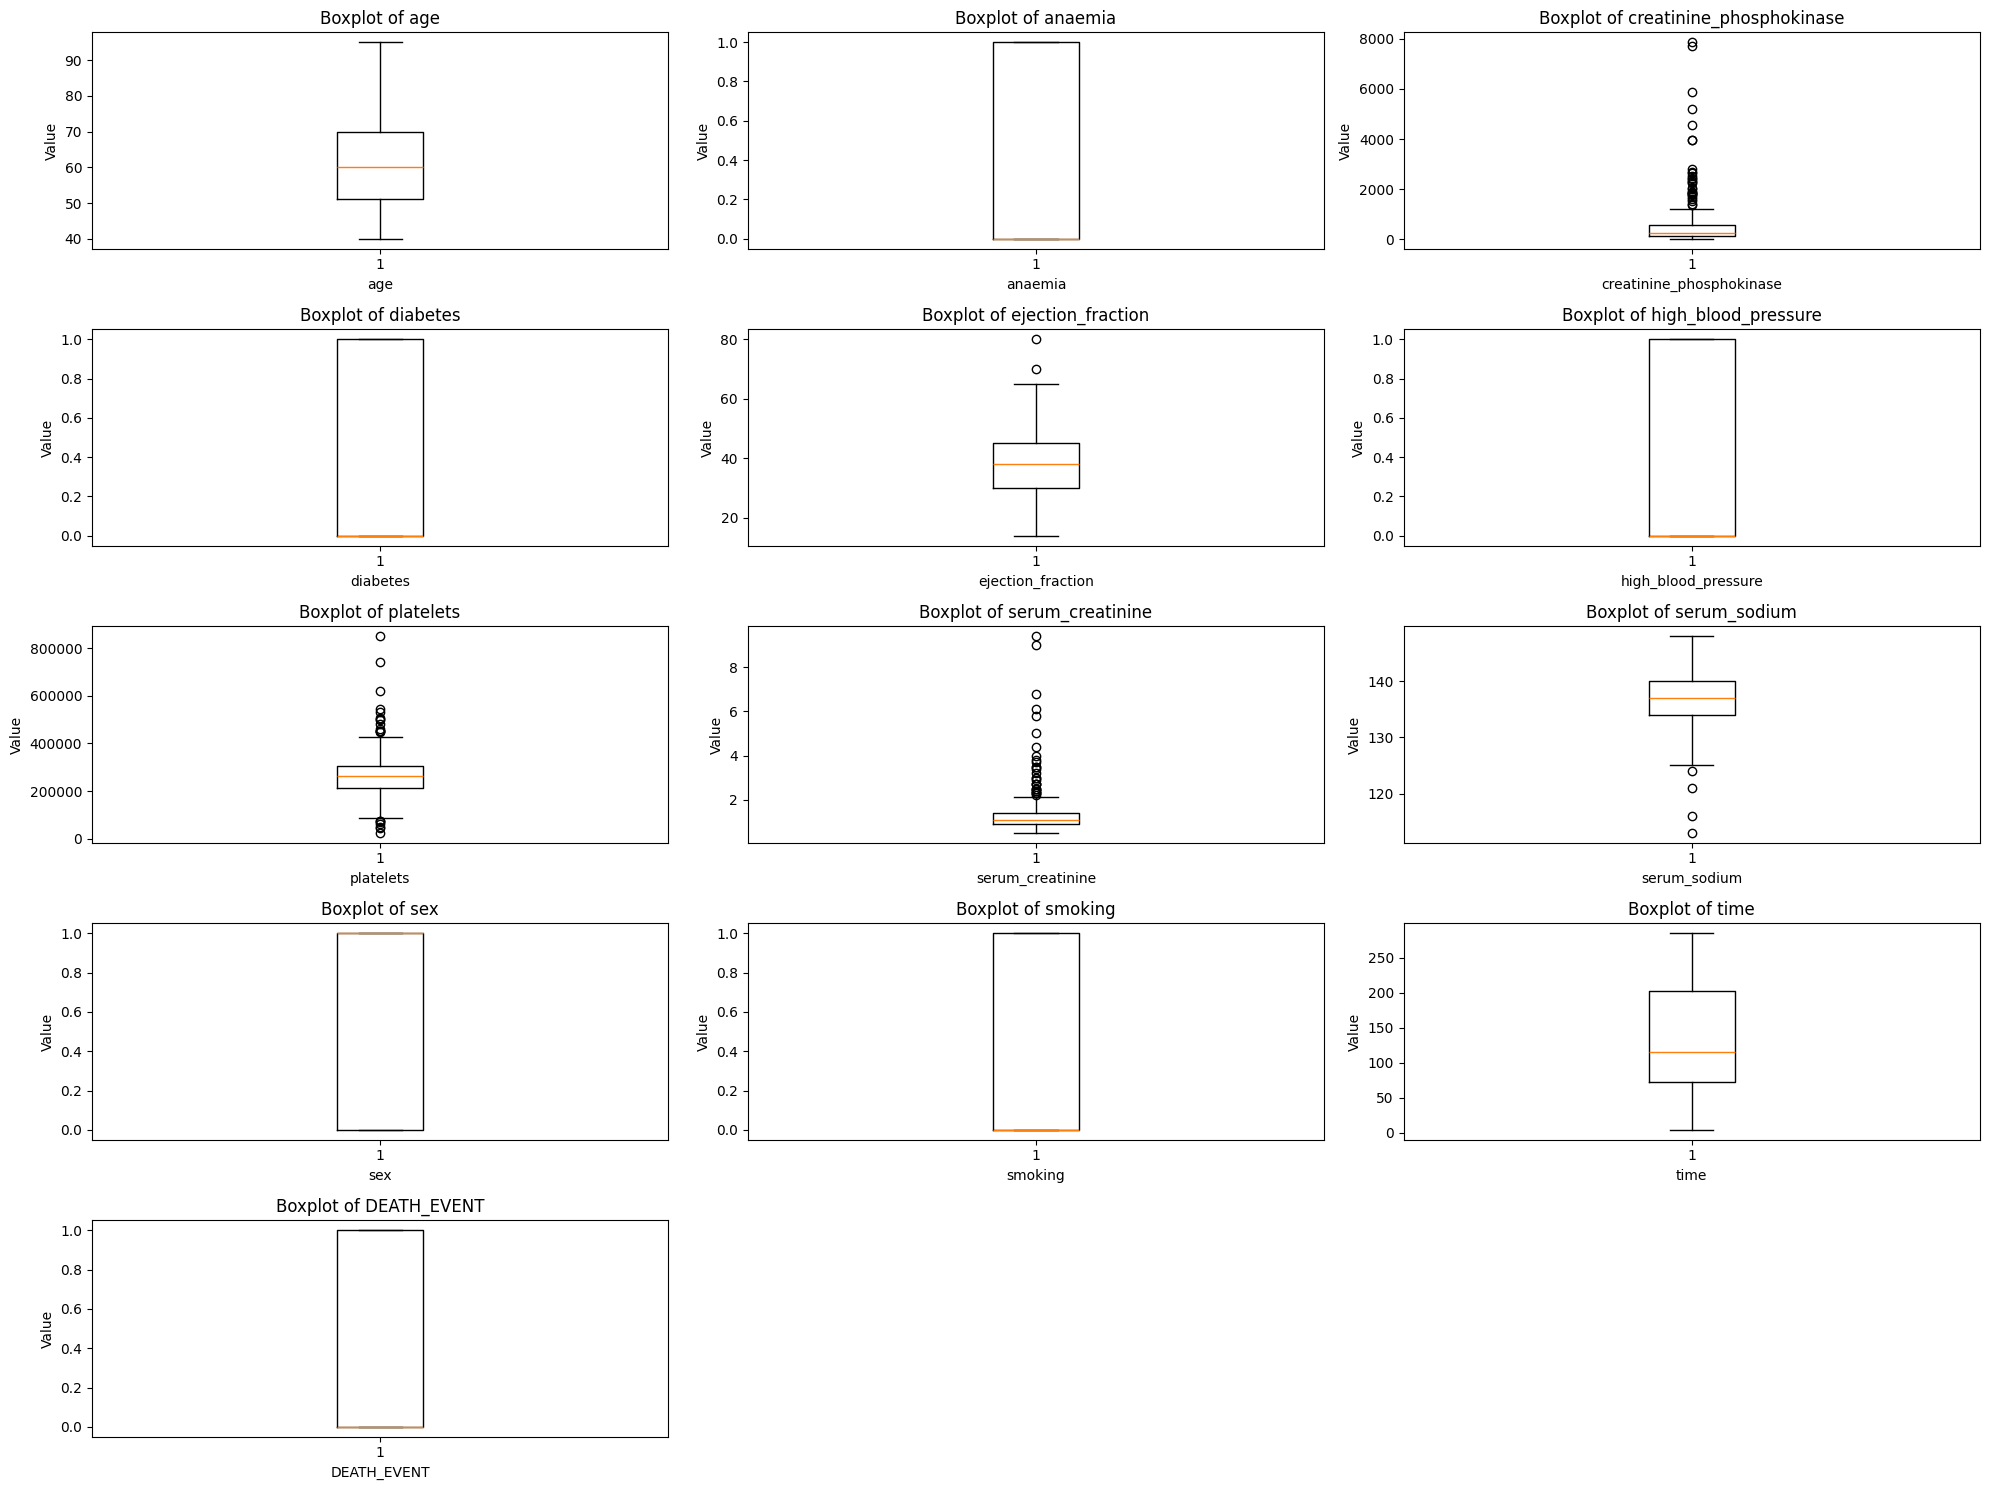

In [22]:
import numpy as np

#Finding outliers using Z-score
from scipy.stats import zscore

variables = data_csv.select_dtypes(include=np.number).columns.tolist()
z_scores = np.abs(zscore(data_csv[variables]))

# Set a threshold for Z-score (e.g., 3)
threshold = 3
outliers = np.where(z_scores > threshold)

# Display the indices of outliers
print("Indices of outliers:", outliers)

# Visualize outliers using boxplots
num_variables = len(variables)
num_rows = int(np.ceil(num_variables / 3))
num_cols = min(num_variables, 3)

plt.figure(figsize=(20, 15))
for i, column in enumerate(variables):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.boxplot(data_csv[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
plt.tight_layout()
plt.show()


Preprocessing the dataset:
Remomving outliers

Indices of outliers before removing: (array([  1,   4,   9,  19,  28,  52,  52,  60,  64,  72, 103, 105, 109,
       131, 134, 171, 199, 217, 228, 296], dtype=int64), array([2, 8, 7, 8, 7, 2, 7, 2, 4, 2, 2, 6, 6, 7, 2, 2, 8, 7, 7, 6],
      dtype=int64))
Indices of outliers after removing: (array([  1,   4,   9,  19,  28,  52,  52,  60,  64,  72, 103, 105, 109,
       131, 134, 171, 199, 217, 228, 296], dtype=int64), array([2, 8, 7, 8, 7, 2, 7, 2, 4, 2, 2, 6, 6, 7, 2, 2, 8, 7, 7, 6],
      dtype=int64))


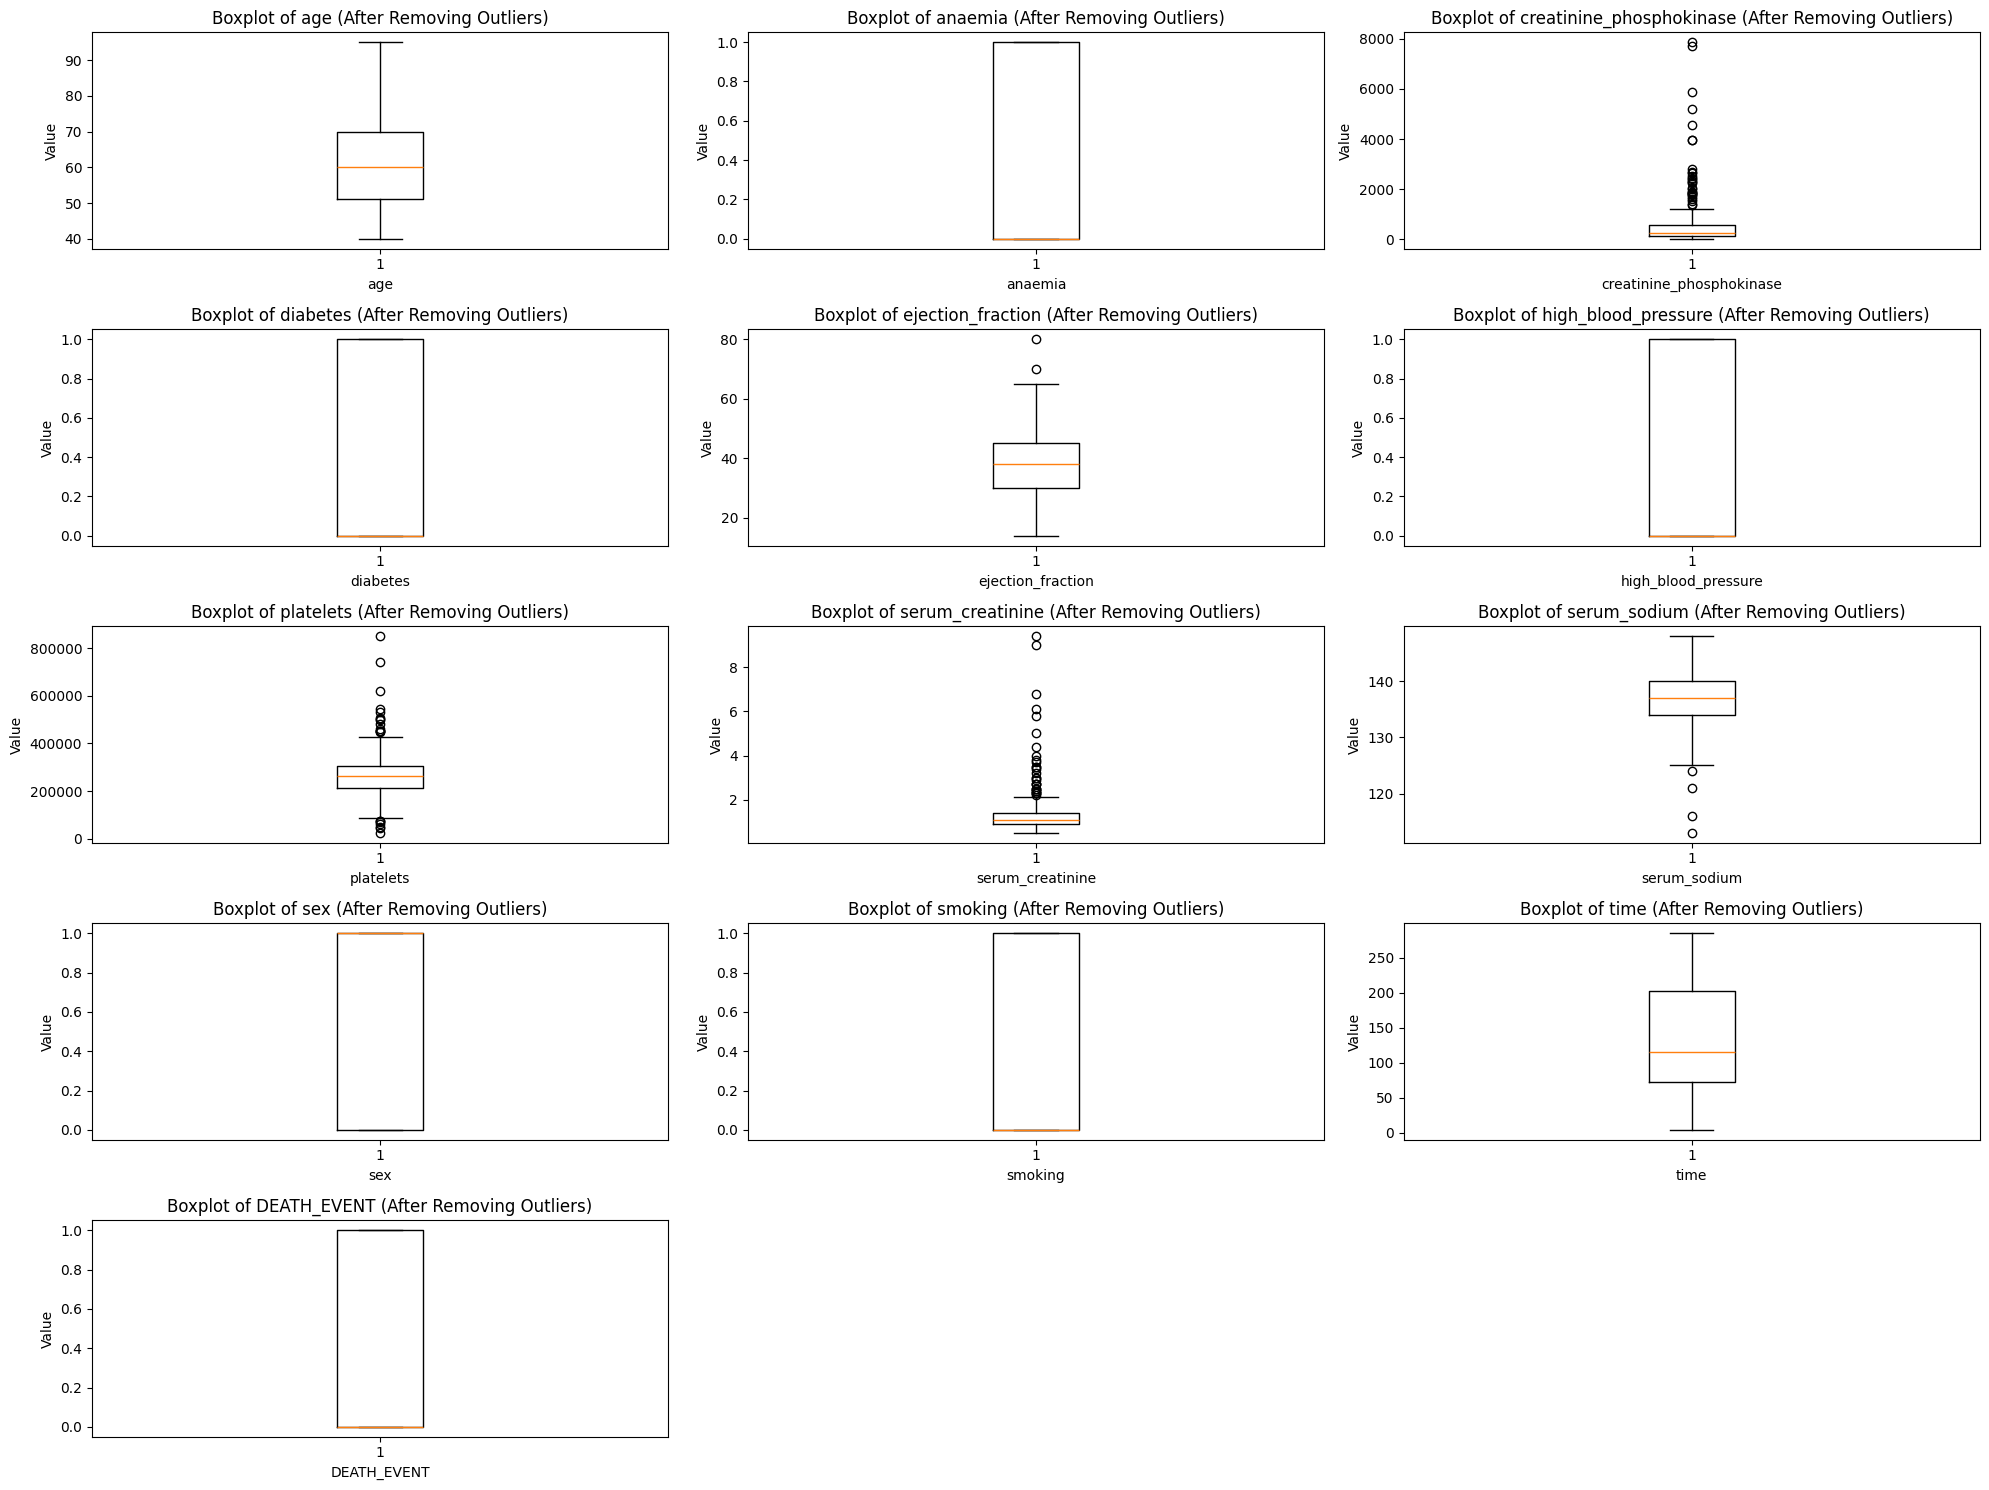

In [26]:
import matplotlib.pyplot as plt
# Creating a copy to preserve the original dataset
data_csv_copy = data_csv.copy() 

#Finding outliers using Z-score
from scipy.stats import zscore

variables = data_csv_copy.select_dtypes(include=np.number).columns.tolist()
z_scores_before = np.abs(zscore(data_csv_copy[variables]))

# Set a threshold of 3 for Z-score 
threshold = 3
outliers_before = np.where(z_scores_before > threshold)

#Displaying the indices of outliers before removing outliers
print("Indices of outliers before removing:", outliers_before)

# Removing outliers by replacing them with median values
for variable, outlier_indices in zip(variables, outliers_before[0]):
    median_value = data_csv_copy[variable].median()
    data_csv_copy.at[outlier_indices, variable] = median_value

# Finding outliers after removing
z_scores_after = np.abs(zscore(data_csv_copy[variables]))
outliers_after = np.where(z_scores_after > threshold)

# Displaying the indices of outliers after removing
print("Indices of outliers after removing:", outliers_after)

# Visualizing outliers using boxplots after removing outliers
num_variables = len(variables)
num_rows = int(np.ceil(num_variables / 3))
num_cols = min(num_variables, 3)

plt.figure(figsize=(20, 15))
for i, column in enumerate(variables):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.boxplot(data_csv_copy[column])
    plt.title(f'Boxplot of {column} (After Removing Outliers)')
    plt.xlabel(column)
    plt.ylabel('Value')
plt.tight_layout()
plt.show()


Prepraring training and test dataset

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Creating a copy to preserve the original dataset
data = data_csv.copy()

# Selecting features (X) and targeting variable (y)
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardizing the features for SVM 
scaler = StandardScaler()
X_train_svm = scaler.fit_transform(X_train)
X_test_svm = scaler.transform(X_test)

#Printing the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

#sets for ANN model
X_train_ann = X_train
X_test_ann = X_test


Shape of X_train: (239, 12)
Shape of X_test: (60, 12)
Shape of y_train: (239,)
Shape of y_test: (60,)


Building SUPPORT VECTOR MACHINE(svm) prediction model

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Creating an SVM model
svm_model = SVC(kernel='rbf', random_state=42)

#Training the SVM model using standardized features
svm_model.fit(X_train_svm, y_train)

# Making predictions on the test set using standardized features
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluating the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {accuracy_svm:.2f}")

# Displaying classification report
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))

Accuracy (SVM): 0.75
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



In [33]:
# Calculating and printing the model score
model_score_svm = svm_model.score(X_test_svm, y_test)
print(f"Model Score (SVM): {model_score_svm:.2f}")

Model Score (SVM): 0.75


Building  Artificial Neural Network(ANN) prediction model 

In [36]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report

#Creating a sequential model
ann_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_ann.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

#Compiling the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Training the model
ann_model.fit(X_train_ann, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

#Evaluating the model on the test set
_, accuracy_ann = ann_model.evaluate(X_test_ann, y_test)
print(f"Accuracy (ANN): {accuracy_ann:.2f}")

#Predictions on the test set
y_pred_ann = (ann_model.predict(X_test_ann) > 0.5).astype(int)

# Displaying classification report
print("Classification Report (ANN):\n", classification_report(y_test, y_pred_ann))




Epoch 1/10


6/6 - 2s - loss: 24268.6641 - accuracy: 0.3089 - val_loss: 11394.0674 - val_accuracy: 0.2500 - 2s/epoch - 399ms/step
Epoch 2/10
6/6 - 0s - loss: 4515.0449 - accuracy: 0.4293 - val_loss: 2482.9341 - val_accuracy: 0.7500 - 70ms/epoch - 12ms/step
Epoch 3/10
6/6 - 0s - loss: 4525.0186 - accuracy: 0.6911 - val_loss: 4289.2466 - val_accuracy: 0.7500 - 67ms/epoch - 11ms/step
Epoch 4/10
6/6 - 0s - loss: 5130.1016 - accuracy: 0.6911 - val_loss: 3230.7451 - val_accuracy: 0.7500 - 70ms/epoch - 12ms/step
Epoch 5/10
6/6 - 0s - loss: 2777.8625 - accuracy: 0.6911 - val_loss: 738.9378 - val_accuracy: 0.7500 - 68ms/epoch - 11ms/step
Epoch 6/10
6/6 - 0s - loss: 1399.6050 - accuracy: 0.4555 - val_loss: 1403.0665 - val_accuracy: 0.2500 - 68ms/epoch - 11ms/step
Epoch 7/10
6/6 - 0s - loss: 1084.8188 - accuracy: 0.5236 - val_loss: 1319.5917 - val_accuracy: 0.7500 - 65ms/epoch - 11ms/step
Epoch 8/10
6/6 - 0s - loss: 1450.3066 - accuracy: 0.6911 - val_loss: 532.2004 - val_accuracy: 0.7500 - 67ms

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier